<a href="https://colab.research.google.com/github/YRYoung/HPC/blob/main/Assigenment/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

* Write a Python function that takes *N* as an input and returns the matrix *A* and vector *f*.
* You should use an appropriate sparse storage format for the matrix *A*.

In [150]:
import numpy as np
from scipy.sparse import csr_matrix,csc_matrix

def generate_mat(N):
    assert N>=0
    if N==2: return np.array([1]),np.array([1])
    
    f = np.concatenate([np.zeros(N),[1]],axis=0)
    
    A = np.zeros([N+1,N+1])
    for i in range(1,N):
        A[i,i-1:i+2]=[-1,2.-(29*29*np.pi*np.pi/4/N/N),-1]
    A[0,0]=1
    A[N,N]=1

    f = csr_matrix(f)
    # A = csr_matrix(A)
    A = csc_matrix(A)
    
    return A,f


A,f=generate_mat(4)
print(A,'\n\n',f)   

  (0, 0)	1.0
  (1, 0)	-1.0
  (1, 1)	-127.69277033306486
  (2, 1)	-1.0
  (1, 2)	-1.0
  (2, 2)	-127.69277033306486
  (3, 2)	-1.0
  (2, 3)	-1.0
  (3, 3)	-127.69277033306486
  (3, 4)	-1.0
  (4, 4)	1.0 

   (0, 4)	1.0


* compute the approximate solution for your problem for *N=10*, *N=100*, and *N=10*.
* Plot the solutions for these three values of *N*.



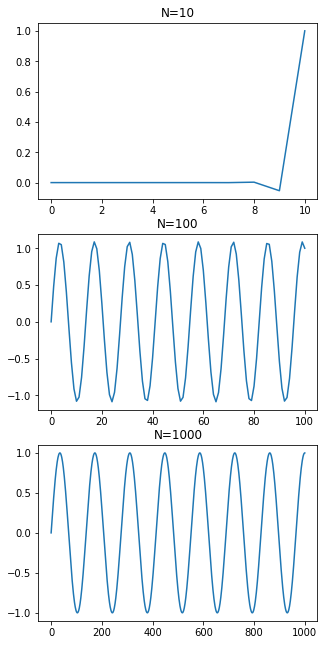

In [218]:
from scipy.sparse.linalg import spsolve
%matplotlib inline
import matplotlib.pyplot as plt
import math


i=0
fig, ax = plt.subplots(3,1,figsize=(5, 11))
print(ax)

for N in [10,100,1000]:
  
  A,f = generate_mat(N)
  u = spsolve(A,f.T)

  x = np.linspace(0,N,N+1)
  ax[i].plot(x,u)
  ax[i].set_title('N='+str(N))
  i=i+1

plt.show()

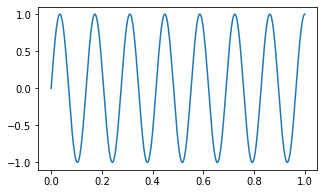

In [216]:
k=29.*np.pi/2.
x = np.linspace(0,1,1000)

u = np.sin(k*x)
plt.figure(figsize=(5,3))
plt.plot(x,u)

plt.show()

* Briefly (1-2 sentences) comment on your plots:

  + __How different__ are they to each other? 

  + Which do you expect to be **closest** to the actual solution of the wave problem?





Closest: N=1000

* Compute this error for a range of values for  of your choice, on axes that use log scales
* plot *N* against the error in your solution.

100%|██████████| 30/30 [00:00<00:00, 46.75it/s]


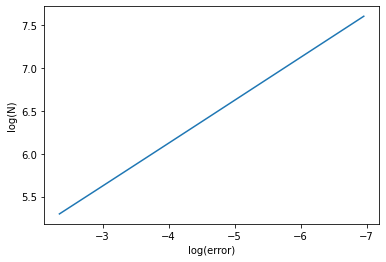

[ 200.  262.  324.  386.  448.  510.  572.  634.  697.  759.  821.  883.
  945. 1007. 1069. 1131. 1193. 1255. 1317. 1379. 1441. 1503. 1566. 1628.
 1690. 1752. 1814. 1876. 1938. 2000.] 
 [0.09586766054920055, 0.05565882127338557, 0.03633430957173464, 0.025573995237820453, 0.018972367863274345, 0.014632525943058187, 0.01162783360165652, 0.00946389585661842, 0.007832076310246131, 0.0066051380545973076, 0.005645193011427827, 0.004880100861250899, 0.004260520421596036, 0.0037517847708618338, 0.003328962362232221, 0.00297375308253129, 0.0026726378844355685, 0.0024152258415697167, 0.002193246308748096, 0.0020004891824873666, 0.0018320463055831876, 0.001683997425554938, 0.0015511889456294309, 0.0014352482033740677, 0.0013318278051735952, 0.0012392210689935543, 0.0011559904018605752, 0.0010808625131308765, 0.0010128198440594281, 0.0009509995575045053]


In [242]:
from scipy.sparse.linalg import spsolve
%matplotlib inline
import matplotlib.pyplot as plt

from tqdm import tqdm
import timeit


i=0
k=29.*np.pi/2.
error=[]
sizes=np.round(np.linspace(200,2000,30))
for N in tqdm(sizes):  

  x = np.linspace(0,1,int(N+1))
  A,f = generate_mat(int(N))
  u = spsolve(A,f.T)
  u_exact = np.sin(k*x) #!!
  error.append(np.max(np.abs(u-u_exact)))
  i=i+1


plt.plot(np.log(error),np.log(sizes))
plt.xlabel('log(error)')
plt.ylabel('log(N)')
ax = plt.gca()
ax.invert_xaxis()
plt.show()

print(sizes,'\n',error)

* For the same values of *N*, measure the time taken to compute your approximations for both functions.
* On axes that both use log scales, plot *N* against the time taken to compute a solution.

100%|██████████| 30/30 [00:02<00:00, 11.87it/s]


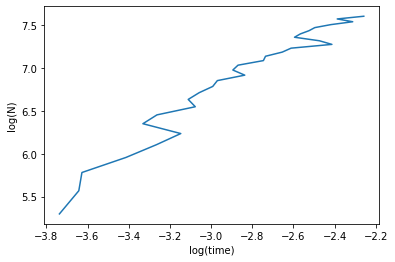

In [229]:
from scipy.sparse.linalg import spsolve
%matplotlib inline
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import timeit


i=0
k=29.*np.pi/2.
times=[]
sizes=np.round(np.linspace(200,2000,30))
for N in tqdm(sizes):  

  x = np.linspace(0,1,int(N+1))
  A,f = generate_mat(int(N))

  t = timeit.Timer(lambda: spsolve(A,f.T)).timeit(110)

  times.append(t)
  i=i+1


plt.plot(np.log(times),np.log(sizes))
plt.xlabel('log(time)')
plt.ylabel('log(N)')
plt.show()